# The Time Domain in Astronomy
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Danselem/brics_astro/blob/main/Week5/02_time_domain.ipynb)

## Understanding Variability and Transients

Astronomical observation fundamentally involves recording light and other radiation from celestial objects. While much of traditional astronomy focuses on the static properties of these objects (their position, average brightness, spectral type), a significant and increasingly important area of research is understanding how they change over time. This field is known as **Time Domain Astronomy**.

The variability of celestial objects provides insights into the physical processes driving them. These changes can occur on timescales ranging from milliseconds (e.g., pulsar pulses) to years (e.g., stellar cycles, orbital periods of binary stars) or even millennia (e.g., the evolution of supernova remnants).

A particularly exciting subset of time domain astronomy focuses on **transient** events – a phenomena that appear suddenly, change rapidly, and then fades away. Examples include supernovae (exploding stars), gamma-ray bursts, stellar flares, or tidal disruption events (when a star gets too close to a black hole).


Detecting and characterizing these transients requires continuous monitoring of large areas of the sky. Modern survey telescopes like the Zwicky Transient Facility (ZTF) and the upcoming Vera C. Rubin Observatory (LSST) are specifically designed for this purpose, generating vast amounts of time series data.

This notebook introduces the core concept of **time series data** in astronomy, focusing on the measurement of an object's brightness over time, and how we begin to handle and visualize this data in Python, utilizing the `astropy.time` module for time representation.

**Learning Objectives:**

*   Understand the definition and significance of time series data in astronomy.
*   Distinguish between variable and transient astronomical phenomena.
*   Relate the concepts of astronomical brightness (flux and magnitude) to their variation over time.
*   Learn about the **light curve** as the primary tool for visualizing brightness changes.
*   Represent simple time series data in Python.
*   Utilize the `astropy.time` module for handling astronomical time.
*   Explore examples of variability across different electromagnetic wavelengths.

**Prerequisites:**

*   Basic familiarity with Python syntax (variables, data types, lists, basic loops).
*   Basic understanding of NumPy arrays and Matplotlib plotting concepts.
*   Familiarity time. This includes both periodic and aperiodic changes, and can encompass transients as a subset.
*   Familiarity with Jupyter Notebooks.

**Key Terms:**

*   **Time Series Data:** A time series is a sequence of measurements of a property (such as brightness, position, or velocity) recorded at successive points in time.
*   **Time Domain Astronomy:** The branch of astronomy that studies how celestial objects change over time. Phenomena such as erupting stars, supernovae explosions, active galactic nuclei flares, and orbiting exoplanets reveal themselves through variations in their observed characteristics.
*   **Light Curve:** A graph plotting the brightness (typically flux or magnitude) of an astronomical object as a function of time.
*   **Transient:** An astronomical object or phenomenon that is short-lived, appearing or changing significantly in brightness or other properties over a relatively brief period (e.g., supernovae, gamma-ray bursts, stellar flares).
*   **Variable Object:** An astronomical object whose brightness, spectrum, or other properties change over of brightness (flux and magnitude) to time in the context of light curves.
*   **Flux:** A physical measure of the rate of energy flow from an astronomical source per unit area (e.g., measured in Watts per square meter or Janskys). Increasing flux means increasing brightness.
*   **Magnitude:** A logarithmic scale for measuring the apparent brightness of an object, primarily used in optical and near-infrared astronomy. The magnitude scale is inverted: a smaller magnitude number corresponds to a brighter object.
*   **Epoch:** A specific point in time relevant in time.
*   **Variable Star:** A star whose brightness fluctuates to an observation or astronomical event.

## The Concept of Time in Astronomical Observations

Understanding how astronomical objects change requires accurately recording when observations are made. While a standard clock on Earth gives us a convenient measure of local time, precise astronomical comparisons, especially in **Time Domain Astronomy**, necessitate a more rigorous approach.

The complexity arises because our telescopes are located on a moving platform: the Earth. The Earth rotates on its axis and orbits the Sun. These motions affect the exact moment light from a distant source arrives at the telescope compared to when it would arrive at a fixed, inertial point (like the center of mass of the Solar System, the barycenter). Relativistic effects, though often small, can also play a role for high-precision work.

To overcome this, astronomers use standard astronomical timescales and coordinate systems. These scales provide a uniform reference, allowing observations taken at different locations or significantly different times to be compared consistently. For example, **Barycentric Julian Date (BJD)** is a widely used timescale that corrects the observation time to the moment light would have arrived at the Solar System barycenter. Using a standard scale ensures that observed variations (like the dip during an exoplanet transit) are physically real events occurring at a consistent time relative to the source, rather than artifacts of the observer's motion.

Handling these various timescales and formats (like Julian Date, Modified Julian Date, or precise calendar representations) accurately in computational analysis is crucial. In Python, the `astropy.time` module is the standard and recommended library specifically designed for this purpose, providing tools to represent, convert, and perform arithmetic with astronomical time coordinates.

## Handling Astronomical Time with Astropy

Accurately representing and manipulating time is fundamental in time domain astronomy. Observations from different telescopes, locations, or epochs need to be compared in a consistent framework. Simple numerical counts (like "days since the first observation") are not sufficient for precise astronomical work due to complexities like Earth's motion, rotation, and relativistic effects.

The `astropy.time` module provides a powerful and flexible way to handle astronomical time coordinates. The core object is `astropy.time.Time`. It allows you to:

*   Create time objects from various standard formats (e.g., ISO 8601 strings, Julian Date, Modified Julian Date).
*   Specify the appropriate **time scale** (e.g., UTC, Barycentric Julian Date - BJD, Terrestrial Time - TT).
*   Convert between different time scales and formats.
*   Perform arithmetic operations with time objects.
*   Prepare time data for accurate plotting on a time axis.

Let's look at a few examples of how to create and manipulate Astropy Time Objects
First, let's import the modules.

In [ ]:
import numpy as np
from astropy.time import Time
import astropy.units as u # Import units for time arithmetic
import matplotlib.pyplot as plt
import pandas as pd

### Creating Time Objects
Let's look at the different time formats. All `astropy` time formats can be found at <https://docs.astropy.org/en/stable/time/index.html#time-format>.


#### 1. From a standard calendar date/time string (ISO 8601 format)
Specify the time scale, e.g., `utc` for Coordinated Universal Time

In [2]:
observation_time_utc = Time('2023-11-15 12:00:00', scale='utc')
print(f"Time from ISO string (UTC): {observation_time_utc.iso}")

Time from ISO string (UTC): 2023-11-15 12:00:00.000


#### 2. From Julian Date (JD)
Julian Date or `JD` is a continuous count of days since noon Universal Time on Jan 1, 4713 BC. See <https://www.aavso.org/about-jd> for more details on JD.

In [3]:
time_jd_number = 2460265.0 # Corresponds to 2023-11-16 00:00:00 UTC
obs_time_jd = Time(time_jd_number, format='jd', scale='utc')
print(f"Time from Julian Date (UTC): {obs_time_jd.jd}")

Time from Julian Date (UTC): 2460265.0


#### 3. From Modified Julian Date (MJD)
`MJD` is days since Nov 17, 1858, common in astronomical archives. For more on MJD, see <https://core2.gsfc.nasa.gov/time/>

In [4]:
time_mjd_number = 60264.5 # Corresponds to 2023-11-15 00:00:00 UTC
obs_time_mjd = Time(time_mjd_number, format='mjd', scale='utc')
print(f"Time from MJD number (UTC): {obs_time_mjd.mjd}")

Time from MJD number (UTC): 60264.5


### Converting Between Formats

Let's convert our UTC Time object to other formats

In [6]:
print(f"\n{observation_time_utc.iso} in MJD: {observation_time_utc.mjd}")
print(f"{observation_time_utc.iso} in JD: {observation_time_utc.jd}")


2023-11-15 12:00:00.000 in MJD: 60263.5
2023-11-15 12:00:00.000 in JD: 2460264.0


In [7]:
# --- Performing Time Arithmetic ---

# Add 1 day and 6 hours to the observation time
time_plus_day_hours = observation_time_utc + 1*u.day + 6*u.hour
print(f"\nTime + 1 day 6 hours: {time_plus_day_hours.iso}")


Time + 1 day 6 hours: 2023-11-16 18:00:00.000


In [8]:
# Calculate the difference between two times (result is an Astropy TimeDelta object)
time_difference = Time('2023-11-16 00:00:00') - observation_time_utc
print(f"Time difference: {time_difference}")
print(f"Time difference in hours: {time_difference.to(u.hour)}")

Time difference: 0.5
Time difference in hours: 12.0 h


In [9]:
# Astropy Time can handle arrays of times
mjd_array = np.array([60264.1, 60264.2, 60264.3]) # Sequence of MJD values
time_array_mjd = Time(mjd_array, format='mjd', scale='utc')
print(f"\nAstropy Time array from MJD:\n{time_array_mjd}")


Astropy Time array from MJD:
[60264.1 60264.2 60264.3]


In [ ]:
# Accessing individual times from an array
print(f"Second time in the array (MJD {time_array_mjd[1].mjd}): {time_array_mjd[1].iso}")

Second time in the array (MJD 60264.2): 2023-11-16 04:48:00.000


## The Light Curve

The light curve is the fundamental tool for analyzing time series data in astronomy. It is a two-dimensional plot of an object's measured brightness as a function of time. The morphology of a light curve—its shape, amplitude, period, and duration of features—reveals the physical processes driving the observed variability.

*   **X-axis (Time):** Represents the time of each observation. For precise analysis, this is often a standard astronomical time coordinate like Barycentric Julian Date (BJD).
*   **Y-axis (Brightness):** Represents the measured brightness, typically as **Flux** (a linear measure of energy) or **Magnitude** (a logarithmic, inverted scale).

### The Importance of a Standard Time Reference: BJD

Astronomical observations are made from Earth, a platform that is both rotating and orbiting the Sun. This motion introduces variations in the light-travel time from a celestial source to the telescope. To remove this effect and accurately compare data from different epochs or observatories, astronomers convert observation times to a common, stable reference frame.

The most common reference is the Solar System Barycenter (the system's center of mass). Times corrected to this frame are given as **Barycentric Julian Date (BJD)**. Using BJD ensures that any observed timing variations are intrinsic to the astronomical source, not an artifact of the observer's motion. The `astropy.time` module is the standard tool for performing this conversion.

## Common Light Curve Examples

### OGLE-2019-BLG-1180

Below is the OGLE/KMTNet light curve for a planetary microlensing event OGLE-2019-BLG-1180. You can read more about the event in [arXiv](https://arxiv.org/abs/2312.01278) or the [IOP publication](https://iopscience.iop.org/article/10.3847/1538-3881/ad0723). The event was observed with OGLE and KMTNet in optical `I` band magnitude and the time is in HJD.

In [ ]:
from astropy.table import Table
from astroquery.vizier import Vizier

vizier = Vizier()

vizier.ROW_LIMIT = -1
ogle = vizier.get_catalogs("J/AJ/166/253/fig1")[0]


ogle[:5]

Inst,HJD,Imag,e_Imag
,d,mag,mag
str6,float64,float32,float32
KMTA02,8534.23049,19.001,0.175
KMTA02,8536.25367,19.351,0.179
KMTA02,8536.26887,19.180,0.164
KMTA02,8539.26076,18.844,0.116
KMTA02,8540.25279,18.862,0.115


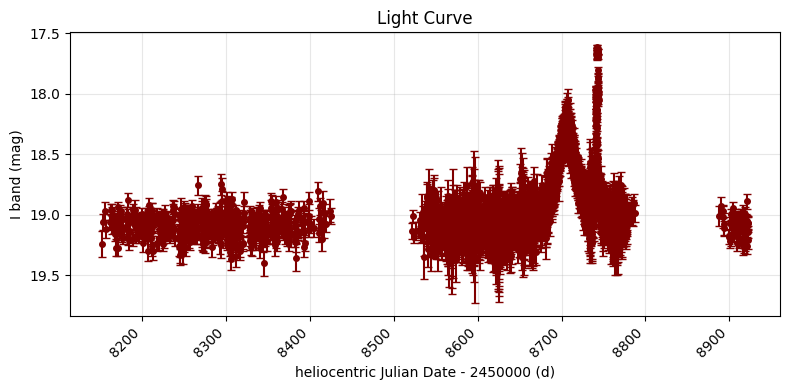

In [ ]:
jd_offset = 2450000
times = Time(ogle['HJD'] + jd_offset, format='jd', scale='utc')
x_vals = times.jd - jd_offset

# 2. Now plot Imag vs time with error bars


fig, ax = plt.subplots(figsize=(8,4))

ax.errorbar(x_vals, ogle['Imag'], yerr=ogle['e_Imag'], color='maroon', fmt='o', markersize=4, capsize=3)
ax.invert_yaxis()  # Magnitudes get brighter going down
ax.set(xlabel='heliocentric Julian Date - 2450000 (d)', ylabel='I band (mag)')
ax.set_title('Light Curve')
# Disable scientific notation on x-axis
ax.ticklabel_format(style='plain', axis='x')

# Rotate x-axis labels for neatness
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

The light curve shows a transient event which spans from days 8650 to 8750 with a significant rise and fall and a long duration with 1 magnitude or more higher than the quiescent level.

## Sgr A*


The first detection from the Spitzer Space Telescope of 4.5 μm variability from Sgr A*, the emitting source associated with the Milky Way's central black hole. See the paper here <https://iopscience.iop.org/article/10.1088/0004-637X/793/2/120> or in [arXiv](https://arxiv.org/abs/1408.1951).

In [ ]:
sgr = vizier.get_catalogs("J/ApJ/793/120/table1")[0]

sgr[:5]

MJD,SgrA*,Ref
d,Jy,Jy
float64,float64,float64
56636.1808736,0.00210,0.00036
56636.1809705,0.00404,0.00228
56636.1810678,0.00393,0.00001
56636.1811650,0.00294,0.00021
56636.1812623,0.00233,0.00096


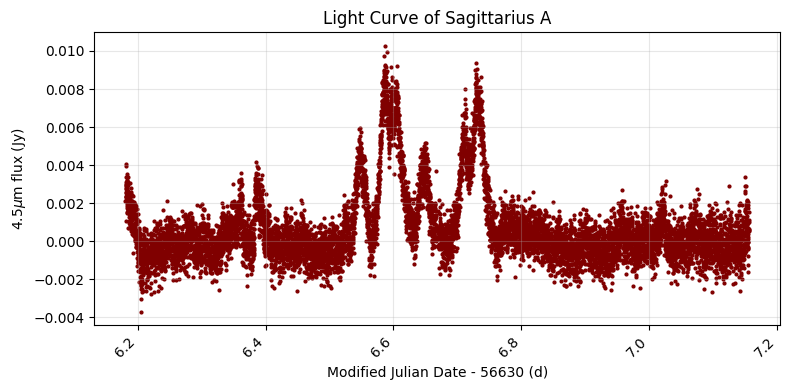

In [ ]:
mjd_offset = 56630
sgr_time = Time(sgr['MJD'], format='mjd', scale='utc')

x_vals = sgr_time.mjd - mjd_offset

# 2. Now plot Imag vs time with error bars


fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(x_vals, sgr['SgrA*'], color='maroon',s=4)

ax.set(xlabel='Modified Julian Date - 56630 (d)', ylabel=r'$4.5 \mu$m flux (Jy)')
ax.set_title('Light Curve of Sagittarius A')
# Disable scientific notation on x-axis
# ax.ticklabel_format(style='plain', axis='x')

# Rotate x-axis labels for neatness
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

The light curve shows a function of the infra-red flux over time. A significant variability is noticed between MJD 56636.5 - 56636.8 days.

## Radio light curve

Variability in the radio part of the electromagnetic spectrum typically originates from physical processes that are very different from the thermal (heat-based) emission we see from stars in the optical. The primary mechanisms are:

* Synchrotron Emission: Generated by relativistic electrons spiraling in strong magnetic fields. This is common in the jets launched by Active Galactic Nuclei (AGN), in the remnants of supernovae, and in stellar flares.
  
* Coherent Emission: A process where particles emit radiation in phase with each other, producing intensely bright, focused beams. This is the mechanism responsible for the radio emission from pulsars.

Radio brightness is measured in terms of Flux Density, with the standard unit being the Jansky (Jy), where 1 Jy = 10⁻²⁶ W m⁻² Hz⁻¹.

Some examples of objects studied with radio light curves include:

* Pulsars: Rapidly rotating neutron stars that emit beams of radio waves. If the beam sweeps across our line of sight, we observe incredibly regular, sharp pulses. The light curve consists of a series of narrow, periodic spikes against a noisy background.
  
* Active Galactic Nuclei (AGN): The central regions of galaxies hosting supermassive black holes. Their radio light curves often show slower, aperiodic "flickering" or large outbursts over months to years as material interacts with the accretion disk and jets.
  
* Fast Radio Bursts (FRBs): Mysterious, extremely powerful, and very brief (millisecond-duration) bursts of radio waves from extragalactic sources. Their light curve is a single, sharp spike.


Below is an example of a radio light curve from [arXiv](https://arxiv.org/abs/2008.07945) of the source (J1402+5347) showing extreme (~50%) and variations on a timescale of just 6.5 minutes observed in L band (1.4 GHz).

In [ ]:
rad = vizier.get_catalogs("J/A+A/641/L4/02-03-20")[0]

rad[:5]

In [ ]:

rad_time = Time(rad['JD'], format='jd', scale='utc')

# times = Time(ogle['HJD'] + jd_offset, format='jd', scale='utc')
rad_time = rad_time.jd - jd_offset

fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(rad_time, rad['Flux'], color='maroon',s=4,)

ax.set(xlabel='Julian Date - 2450000 (d)', ylabel=r'Flux density (Jy)')
ax.set_title('Light Curve of J1402+5347 observed on 02-03-20 at 1.4GHz')
# Disable scientific notation on x-axis
ax.ticklabel_format(style='plain', axis='x')

# Rotate x-axis labels for neatness
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

The radio source showed multiple variation across the observed timescale.

### RL Leo
An example is RL Leo, a variable star at a distance of 4731 pc. The lightcurve shown below is from [ASAS-SN](https://asas-sn.osu.edu/variables) Catalog of Variable Stars.

In [ ]:
rleo = pd.read_csv("ASASSN-V J092730.63+110739.6.csv")
rleo = rleo[rleo['mag_err']<1]
rleo.head()

In [ ]:
rleo.describe()

In [ ]:
rl_time = Time(rleo['hjd'], format='jd', scale='utc')

rl_time = rl_time.jd - jd_offset

fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(rl_time, rleo['mag'], color='maroon',s=4,)
ax.errorbar(rl_time, rleo['mag'], yerr=rleo['mag_err'], color='maroon', fmt='o', markersize=4, capsize=3)

ax.set(xlabel='Julian Date - 2450000 (d)', ylabel=r'V magnitude (mag)')
ax.invert_yaxis()  # Magnitudes get brighter going down

ax.set_title('Light Curve of LR Leo')
# Disable scientific notation on x-axis
ax.ticklabel_format(style='plain', axis='x')

# Rotate x-axis labels for neatness
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Summary

This notebook provided an introduction to working with astronomical time series data in Python, a fundamental skill in Time Domain Astronomy. You learned:

*   Time series data captures the variability of celestial objects, including **transients**.
*   **Light curves** are plots of brightness (quantified as **flux** or **magnitude**) versus time.
*   Accurate time handling is crucial and is best managed using the **Astropy Time** module.
*   Astropy `Time` objects can be created from various formats, converted between **time scales**, and used directly for plotting in Matplotlib.
*   Variability patterns differ across the electromagnetic spectrum (Optical, IR, UV, X-ray, Radio), reflecting distinct physical processes.

Working with time series data is essential for understanding the dynamic universe, from pulsating stars to black hole flares and supernovae. This introduction provides a solid foundation for further exploration into time series analysis techniques. The next notebook will demostrate how to query lightcurve data from TESS (Transiting Exoplanet Survey Satellite) and how to find an orbital period from a light curve.

## Additional Resources

Time and Dates in Astronomy: <https://docs.astropy.org/en/stable/time/index.html>